# Homebuilding and Housing stocks Portfolio


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'NVR','LGIH','CTRE','HD', 'RDFN', 'LOW']
start = '2021-01-01'
end = '2022-06-17'

title = 'Homebuilding and Housing Stocks'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  7 of 7 completed


,CTRE,HD,LGIH,LOW,NVR,RDFN,SPY
Date,,,,,,,
2021-01-04,20.146704,255.355927,103.610001,156.960236,4040.649902,67.239998,362.811676
2021-01-05,20.767471,257.416779,106.480003,157.488678,4008.909912,69.000000,365.310455
2021-01-06,21.360020,258.887451,108.480003,159.592850,3966.489990,68.239998,367.494507
2021-01-07,20.593470,257.619965,104.349998,160.219208,4025.929932,71.910004,372.954529
2021-01-08,21.068449,260.358154,97.330002,161.530624,3930.000000,76.510002,375.079498


In [3]:
df.tail()

,CTRE,HD,LGIH,LOW,NVR,RDFN,SPY
Date,,,,,,,
2022-06-10,18.540001,289.239990,91.900002,186.330002,4173.589844,9.59,389.799988
2022-06-13,17.469999,283.160004,84.050003,181.259995,3943.959961,8.55,375.000000
2022-06-14,16.690001,278.670013,83.570000,177.940002,3905.080078,8.13,373.869995
2022-06-15,17.480000,279.730011,83.129997,179.009995,3909.850098,8.03,379.200012
2022-06-16,17.129999,273.459991,76.599998,171.610001,3670.000000,7.24,366.649994


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
CTRE: 16700.0
HD: 16700.0
LGIH: 16700.0
LOW: 16700.0
NVR: 16700.0
RDFN: 16700.0


In [8]:
print('Number of Shares:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
CTRE: 828
HD: 65
LGIH: 161
LOW: 106
NVR: 4
RDFN: 248


In [9]:
print('Beginning Value:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
CTRE: $16681.47
HD: $16598.14
LGIH: $16681.21
LOW: $16637.78
NVR: $16162.6
RDFN: $16675.52


In [10]:
print('Current Value:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
CTRE: $14183.64
HD: $17774.9
LGIH: $12332.6
LOW: $18190.66
NVR: $14680.0
RDFN: $1795.52


In [11]:
result = []
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $78957.32


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: CTRE: -14.97%
Holding Period Return: HD: 7.090000000000001%
Holding Period Return: LGIH: -26.07%
Holding Period Return: LOW: 9.33%
Holding Period Return: NVR: -9.17%
Holding Period Return: RDFN: -89.23%
Holding Period Return: SPY: 1.06%


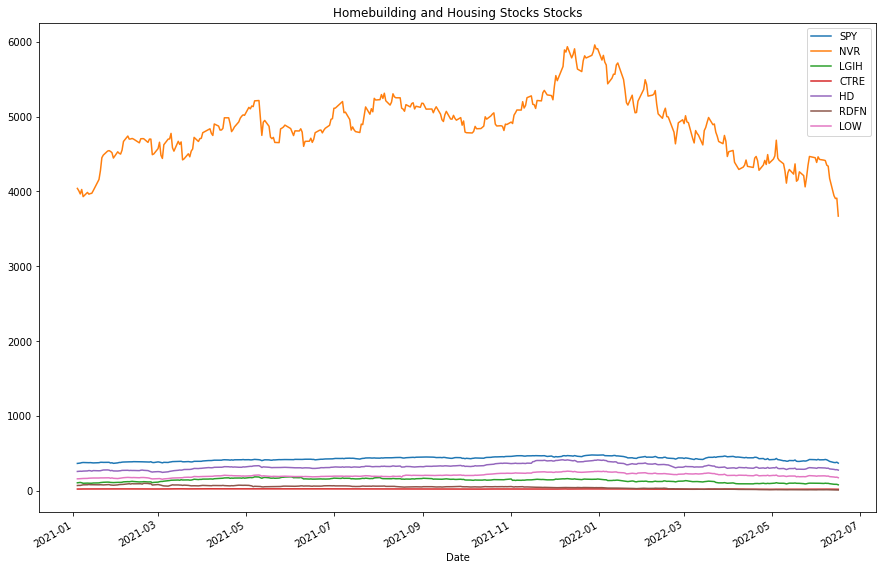

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title(title + ' Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

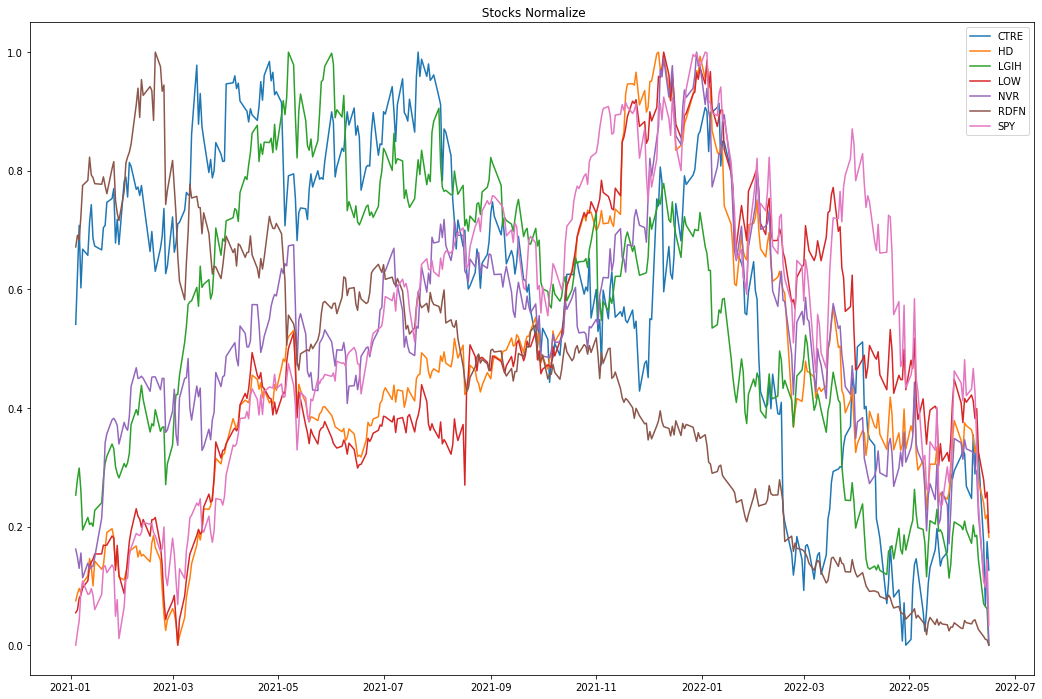

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

CTRE      16.209999
HD       242.787399
LGIH      76.599998
LOW      151.020004
NVR     3670.000000
RDFN       7.240000
SPY      362.811676
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
NVR: 5959.330078125
LGIH: 183.36000061035156
CTRE: 23.485675811767578
HD: 411.0872802734375
RDFN: 96.58999633789062
LOW: 259.4710693359375


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,NVR Return,LGIH Return,CTRE Return,HD Return,RDFN Return,LOW Return
Date,,,,,,,
2021-01-05,0.006887,-0.007855,0.027700,0.030812,0.008071,0.026175,0.003367
2021-01-06,0.005979,-0.010581,0.018783,0.028533,0.005713,-0.011015,0.013361
2021-01-07,0.014857,0.014986,-0.038072,-0.035887,-0.004896,0.053781,0.003925
2021-01-08,0.005698,-0.023828,-0.067274,0.023065,0.010629,0.063969,0.008185


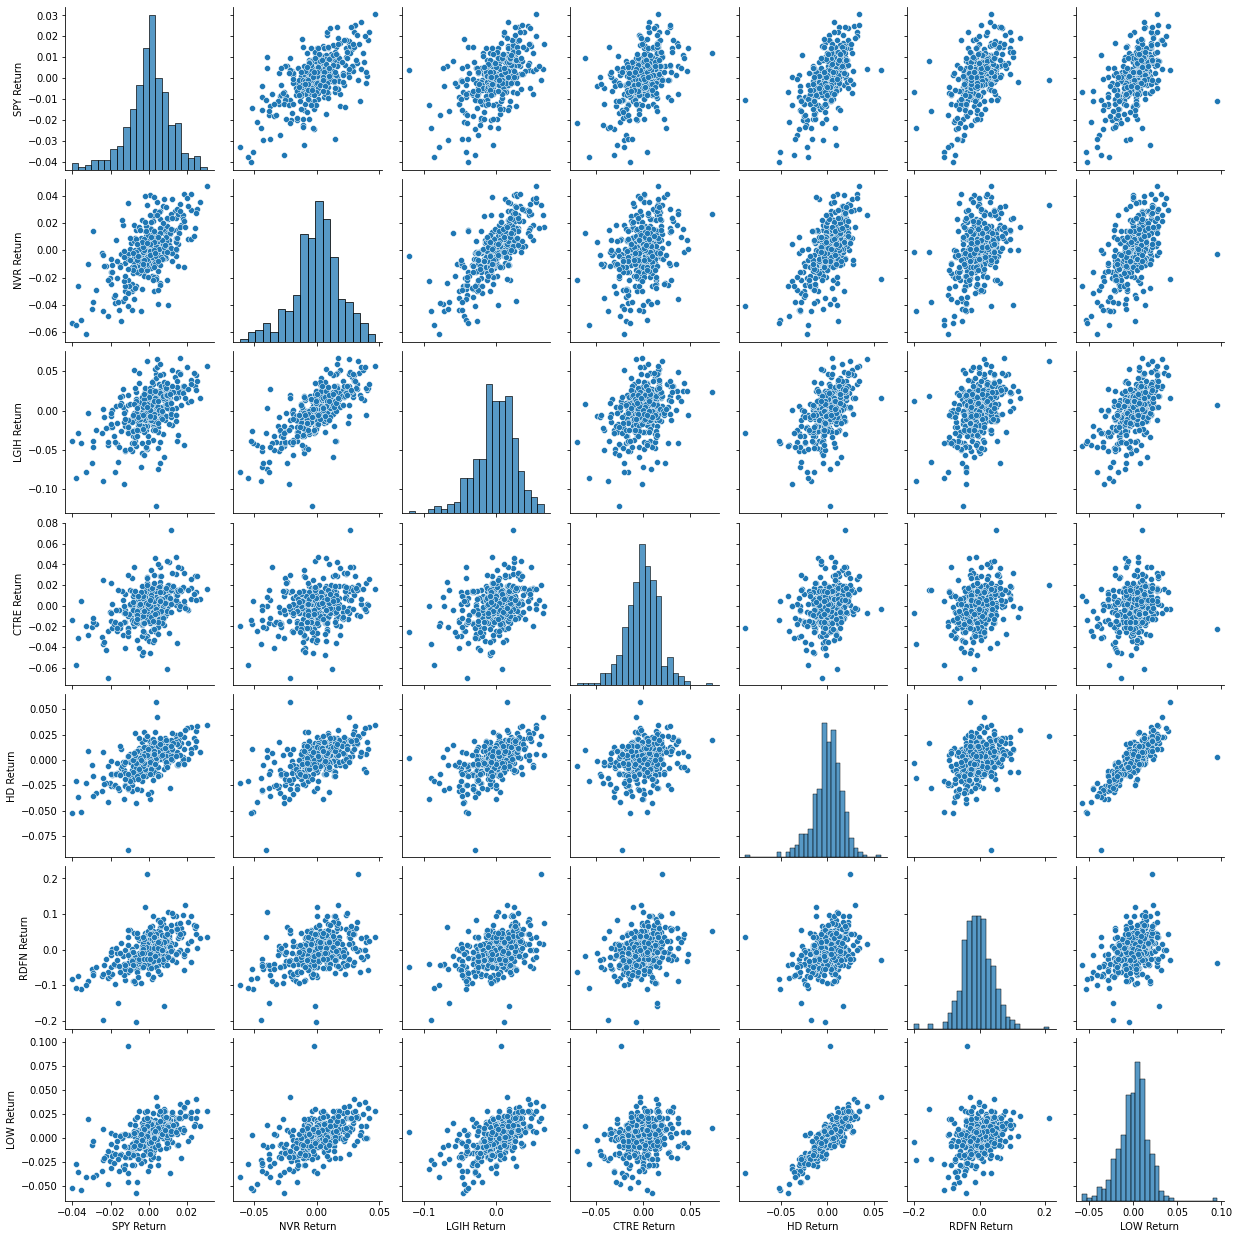

In [19]:
sns.pairplot(returns[1:] )

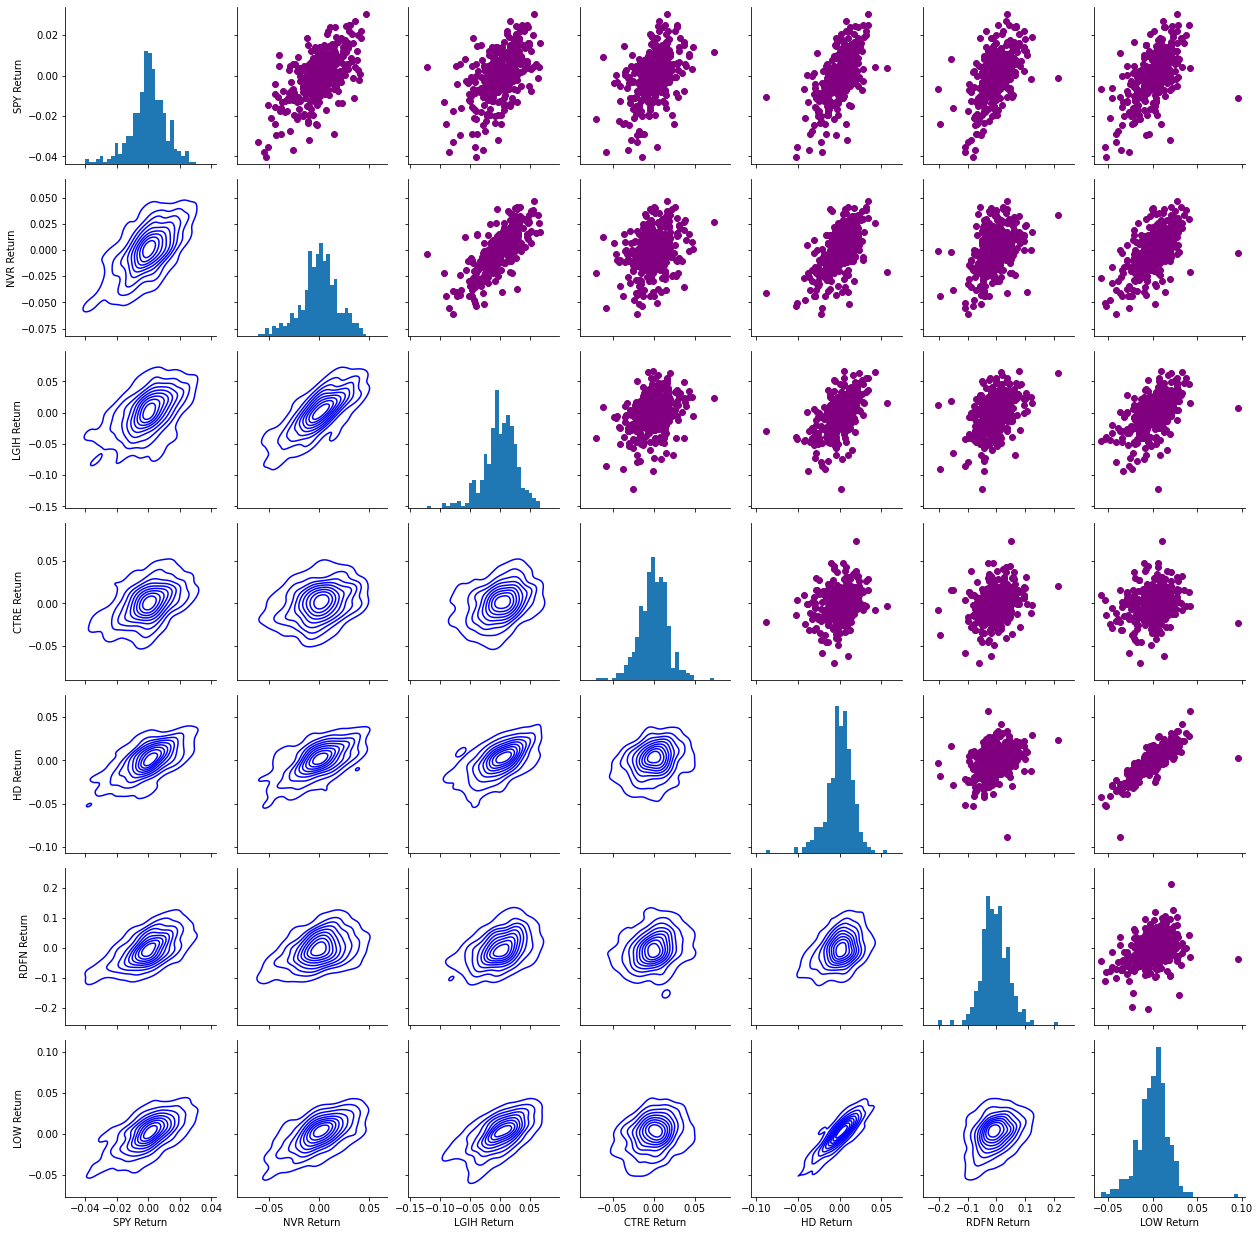

In [20]:
nplot = len(returns.columns)

ax = sns.PairGrid(returns)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

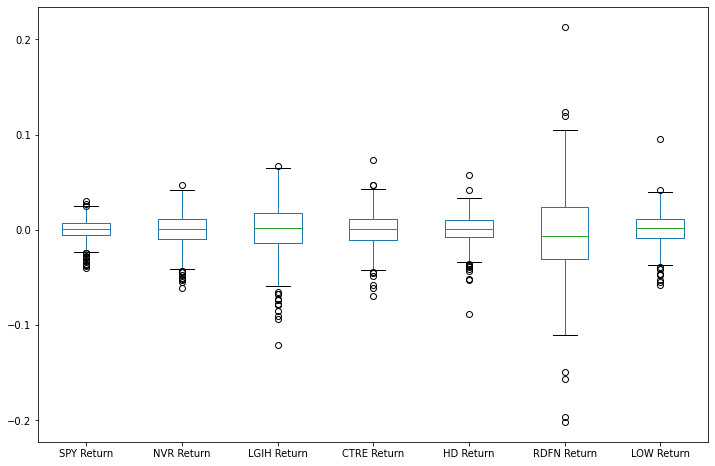

In [21]:
returns.plot(kind='box',figsize=(12,8))

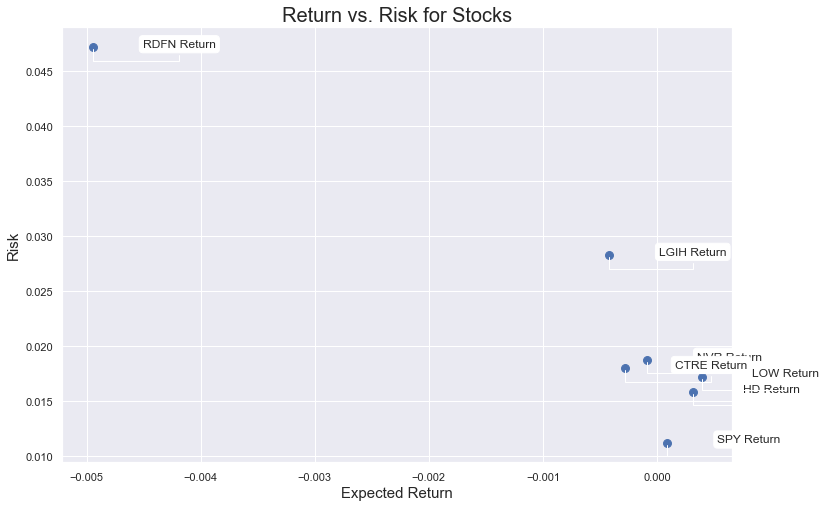

In [22]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [23]:
table = pd.DataFrame()
table['Average Returns'] = returns.mean()
table['Minimum Returns'] = returns.min()
table['Maximum Returns'] = returns.max()
table['Median Returns'] = returns.median()
table['Risk'] = returns.std()
table.sort_values(by='Average Returns')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
RDFN Return,-0.004947,-0.201816,0.213394,-0.006877,0.047186
LGIH Return,-0.000420,-0.121306,0.066694,0.001596,0.028302
CTRE Return,-0.000281,-0.069887,0.073324,0.000740,0.018011
NVR Return,-0.000086,-0.061345,0.046824,0.000484,0.018758
SPY Return,0.000092,-0.040312,0.030453,0.000814,0.011231
HD Return,0.000313,-0.088506,0.057265,0.001416,0.015796
LOW Return,0.000392,-0.057990,0.095852,0.002237,0.017234


In [24]:
table.sort_values(by='Risk')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
SPY Return,0.000092,-0.040312,0.030453,0.000814,0.011231
HD Return,0.000313,-0.088506,0.057265,0.001416,0.015796
LOW Return,0.000392,-0.057990,0.095852,0.002237,0.017234
CTRE Return,-0.000281,-0.069887,0.073324,0.000740,0.018011
NVR Return,-0.000086,-0.061345,0.046824,0.000484,0.018758
LGIH Return,-0.000420,-0.121306,0.066694,0.001596,0.028302
RDFN Return,-0.004947,-0.201816,0.213394,-0.006877,0.047186


In [25]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return    2022-05-04
NVR Return    2022-05-04
LGIH Return   2022-02-15
CTRE Return   2021-12-06
HD Return     2021-11-16
RDFN Return   2022-05-12
LOW Return    2021-08-18
dtype: datetime64[ns]


In [26]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return    2022-05-18
NVR Return    2022-06-16
LGIH Return   2021-11-02
CTRE Return   2022-02-17
HD Return     2022-02-22
RDFN Return   2022-02-18
LOW Return    2021-08-17
dtype: datetime64[ns]


In [27]:
returns.corr()

,SPY Return,NVR Return,LGIH Return,CTRE Return,HD Return,RDFN Return,LOW Return
SPY Return,1.000000,0.617290,0.521577,0.441487,0.601654,0.545340,0.562820
NVR Return,0.617290,1.000000,0.724624,0.304519,0.581299,0.397519,0.580154
LGIH Return,0.521577,0.724624,1.000000,0.357255,0.559193,0.432249,0.551586
CTRE Return,0.441487,0.304519,0.357255,1.000000,0.253839,0.280305,0.209129
HD Return,0.601654,0.581299,0.559193,0.253839,1.000000,0.324617,0.826833
RDFN Return,0.545340,0.397519,0.432249,0.280305,0.324617,1.000000,0.330164
LOW Return,0.562820,0.580154,0.551586,0.209129,0.826833,0.330164,1.000000


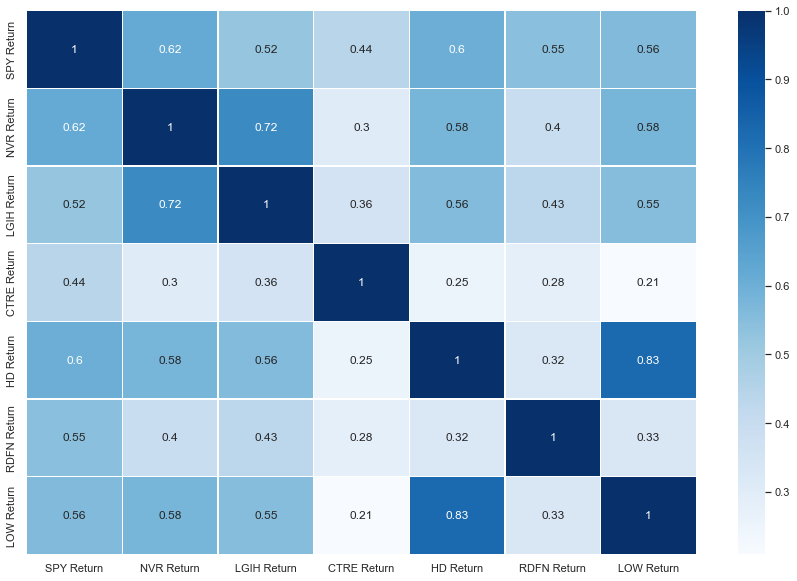

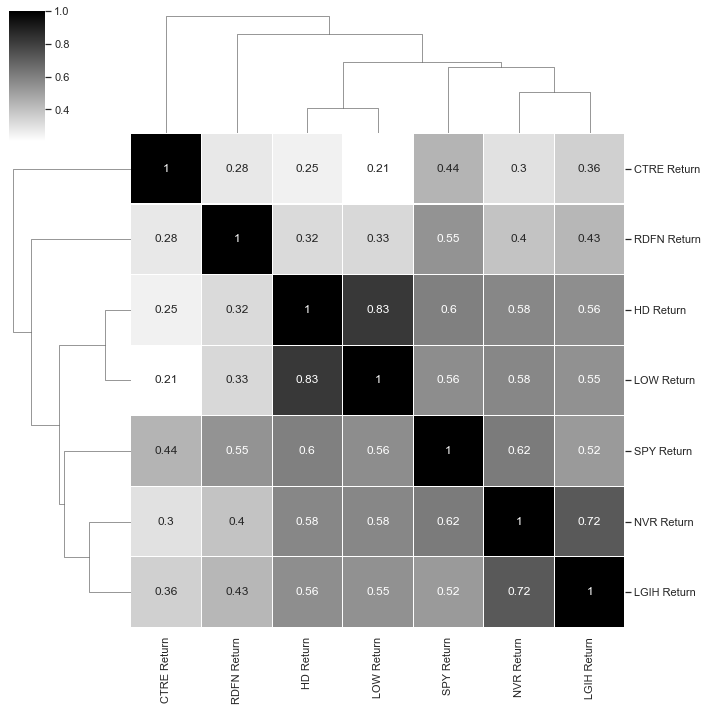

In [28]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

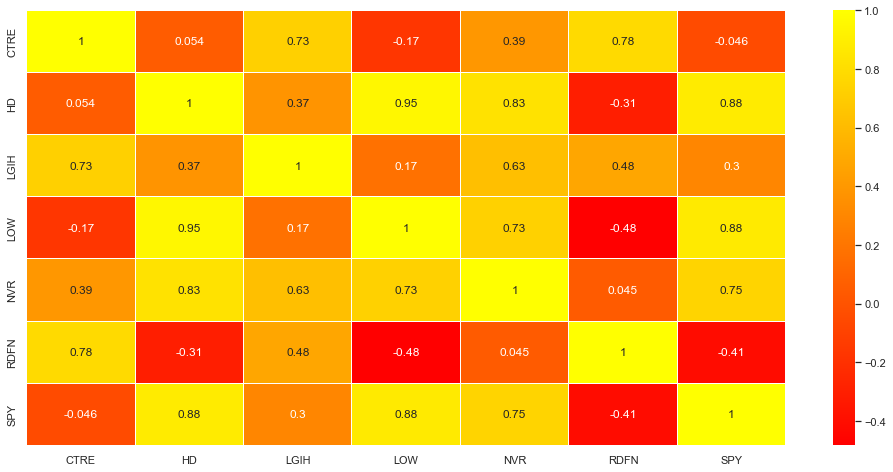

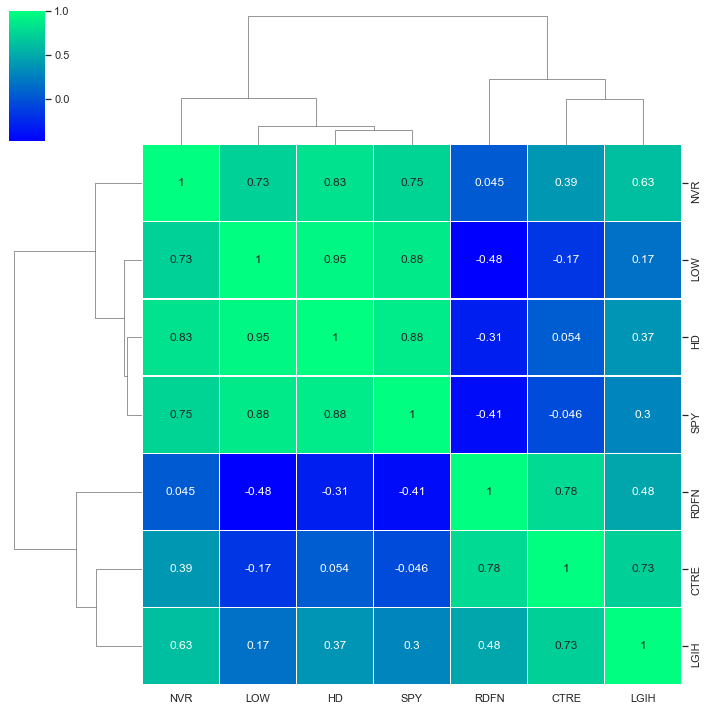

In [29]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [30]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [31]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [32]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.02333152 -0.01990309 -0.03664124 -0.02166338 -0.02409283 -0.06533453
                     -0.01428169]
95%                 [-0.02986607 -0.02563398 -0.04690946 -0.0279158  -0.03089829 -0.08245369
                     -0.01835641]
99%                 [-0.0421238  -0.03638416 -0.06617093 -0.0396443  -0.04366422 -0.11456637
                     -0.02599991]


In [33]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
CTRE: -0.0233
HD: -0.0199
LGIH: -0.0366
LOW: -0.0217
NVR: -0.0241
RDFN: -0.0653
SPY: -0.0143


In [34]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
CTRE: $2330.0
HD: $1990.0
LGIH: $3660.0
LOW: $2170.0
NVR: $2410.0
RDFN: $6530.0
SPY: $1430.0


In [35]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
CTRE: $4210.0
HD: $3640.0
LGIH: $6619.999999999999
LOW: $3960.0000000000005
NVR: $4370.0
RDFN: $11460.0
SPY: $2600.0
